Punto 7

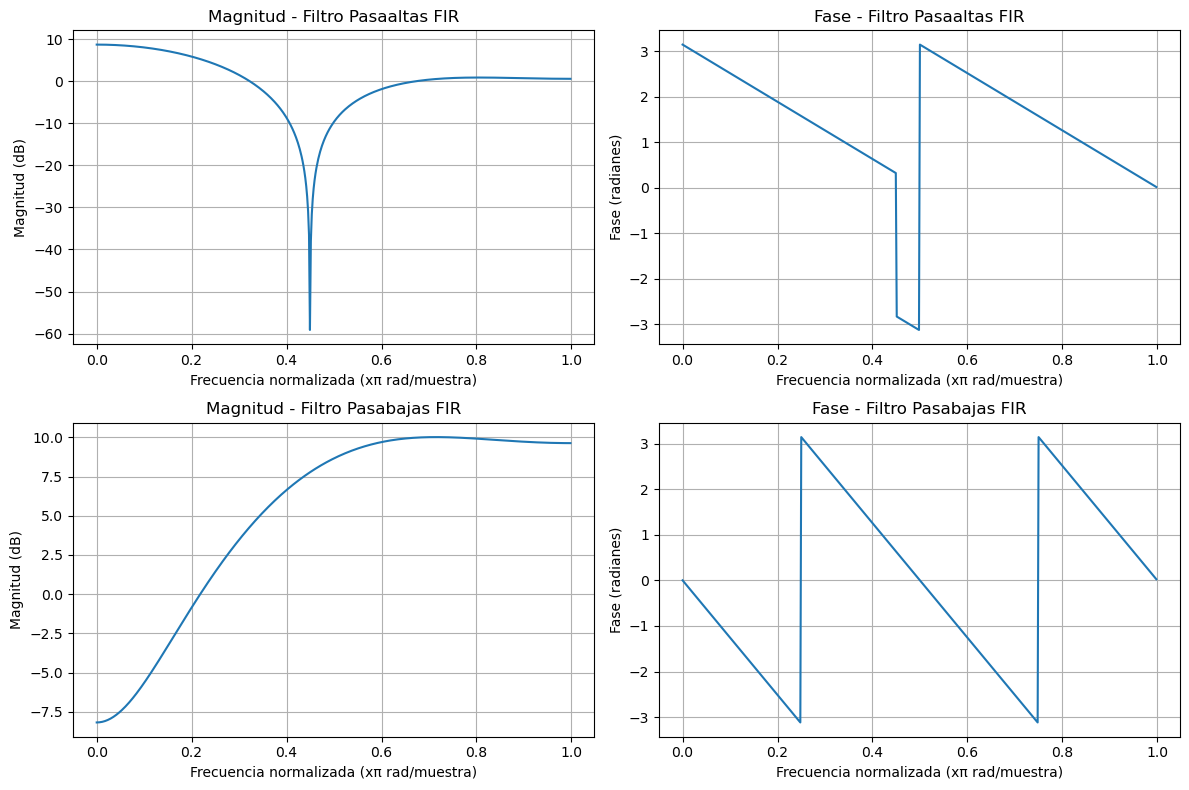

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import freqz

# Coeficientes
b_highpass = [-0.29, -0.95, -0.25, -0.95, -0.29] 
b_lowpass = [0.01, 0.02, -0.25, -0.68, 2.19, -0.68, -0.25, 0.02, 0.01]    

a = [1]

w_high, h_high = freqz(b_highpass, a)

w_low, h_low = freqz(b_lowpass, a)

plt.figure(figsize=(12, 8))

# Magnitud del filtro pasaaltas
plt.subplot(2, 2, 1)
plt.plot(w_high / np.pi, 20 * np.log10(np.abs(h_high)))
plt.title("Magnitud - Filtro Pasaaltas FIR")
plt.xlabel("Frecuencia normalizada (xπ rad/muestra)")
plt.ylabel("Magnitud (dB)")
plt.grid()

# Fase del filtro pasaaltas
plt.subplot(2, 2, 2)
plt.plot(w_high / np.pi, np.angle(h_high))
plt.title("Fase - Filtro Pasaaltas FIR")
plt.xlabel("Frecuencia normalizada (xπ rad/muestra)")
plt.ylabel("Fase (radianes)")
plt.grid()

# Magnitud del filtro pasabajas
plt.subplot(2, 2, 3)
plt.plot(w_low / np.pi, 20 * np.log10(np.abs(h_low)))
plt.title("Magnitud - Filtro Pasabajas FIR")
plt.xlabel("Frecuencia normalizada (xπ rad/muestra)")
plt.ylabel("Magnitud (dB)")
plt.grid()

# Fase del filtro pasabajas
plt.subplot(2, 2, 4)
plt.plot(w_low / np.pi, np.angle(h_low))
plt.title("Fase - Filtro Pasabajas FIR")
plt.xlabel("Frecuencia normalizada (xπ rad/muestra)")
plt.ylabel("Fase (radianes)")
plt.grid()

plt.tight_layout()
plt.show()

Punto 4


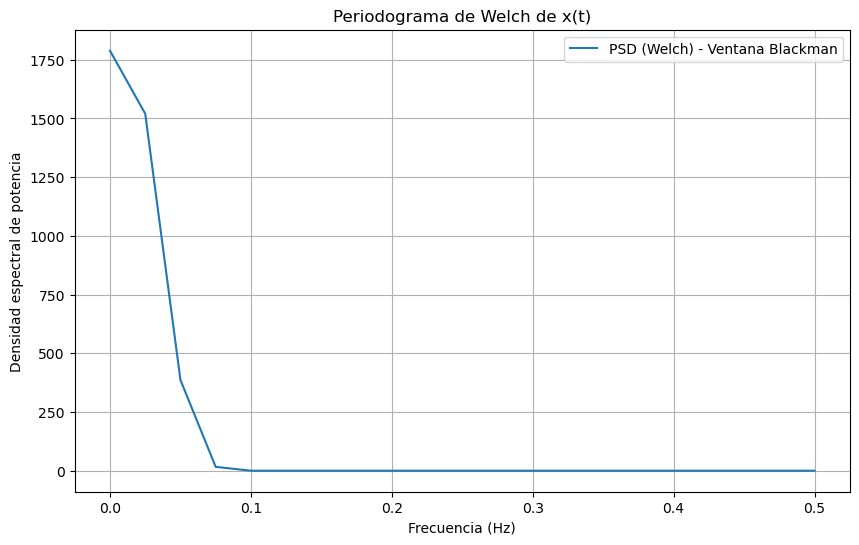

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def welch_periodogram(signal, segment_size, overlap_samples, window_function=np.blackman):

    if overlap_samples >= segment_size:
        raise ValueError("El solapamiento debe ser menor que el tamaño del segmento.")

    # Longitud de la señal y cálculo del número de segmentos
    signal_length = len(signal)
    step_size = segment_size - overlap_samples
    num_segments = (signal_length - overlap_samples) // step_size

    if num_segments < 1:
        raise ValueError("La longitud de la señal es demasiado corta para los parámetros proporcionados.")

    # Ventana y su normalización
    window = window_function(segment_size)
    normalization_factor = np.sum(window**2)

    # Inicializar acumulador para el PSD
    psd_accumulated = np.zeros(segment_size // 2 + 1)
    
    for i in range(num_segments):
        # Obtener el segmento actual
        start_idx = i * step_size
        end_idx = start_idx + segment_size
        segment = signal[start_idx:end_idx]

        # Aplicar ventana
        windowed_segment = segment * window

        # Transformada rápida de Fourier (solo la parte positiva)
        fft_result = np.fft.rfft(windowed_segment)

        # Periodograma del segmento
        segment_psd = (1 / normalization_factor) * np.abs(fft_result)**2

        # Sumar al acumulador
        psd_accumulated += segment_psd

    # Promediar los periodogramas
    psd = psd_accumulated / num_segments

    # Calcular las frecuencias asociadas
    frequencies = np.fft.rfftfreq(segment_size, d=1)  # Suponiendo frecuencia de muestreo = 1 Hz

    return frequencies, psd

# Implementación de x(t)
def x(t):

    return 4 * np.cos(80 * np.pi * t + np.pi / 4) + 14 * np.sin(40 * np.pi * t) + 5

# Ejemplo de uso
if __name__ == "__main__":
    # Generar señal x(t)
    sampling_rate = 1000  # Frecuencia de muestreo (Hz)
    duration = 1          # Duración de la señal (segundos)
    t = np.linspace(0, duration, sampling_rate * duration, endpoint=False)  # Vector temporal
    signal = x(t)  # Generar la señal x(t)

    # Parámetros para el periodograma de Welch
    segment_size = 40
    overlap_samples = 15

    # Calcular el periodograma de Welch
    frequencies, psd = welch_periodogram(signal, segment_size, overlap_samples, window_function=np.blackman)

    # Visualizar el resultado
    plt.figure(figsize=(10, 6))
    plt.plot(frequencies, psd, label="PSD (Welch) - Ventana Blackman")
    plt.title("Periodograma de Welch de x(t)")
    plt.xlabel("Frecuencia (Hz)")
    plt.ylabel("Densidad espectral de potencia")
    plt.grid()
    plt.legend()
    plt.show()